# Competetion


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Feature Selection 

Uses the SelectKBest class from the scikit-learn library to select the top 25 features based on the chi-squared statistical test for non-negative features. This is a form of univariate feature selection which works by selecting the best features based on univariate statistical tests.


In [4]:
# Load the data
data = pd.read_csv('EEG_mouse_data_1.csv')


# Preprocess the data
features = data.columns[1:]  # Select all features except the target variable

X = data[features].values 
y = data['state'].values  # Target variable

# Convert labels to integer values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert integer labels to categorical
y = to_categorical(y)

# Normalize the data

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)

# Now you can safely apply SelectKBest with chi2
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(X, y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.Series(pd.DataFrame(X).columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns

# Print 25 best features
specs_list = featureScores.nlargest(25,'Score')['Specs'].values
print(featureScores.nlargest(25,'Score'))
print(specs_list)


    Specs       Score
2       2  428.342606
7       7  399.867635
1       1  373.554868
4       4  358.268654
3       3  350.730460
12     12  327.344630
6       6  319.441565
5       5  276.745859
11     11  251.706412
13     13  243.534624
15     15  242.031987
14     14  238.723519
8       8  233.282904
10     10  231.756014
16     16  215.878686
17     17  215.578536
18     18  184.023648
9       9  153.122988
64     64  116.621346
70     70  115.692490
71     71  115.597527
75     75  112.165334
76     76  111.646798
73     73  108.062034
72     72  106.964901
[ 2  7  1  4  3 12  6  5 11 13 15 14  8 10 16 17 18  9 64 70 71 75 76 73
 72]


# MLP Model

Epoch 1/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8299 - loss: 0.4681 - val_accuracy: 0.8702 - val_loss: 0.3416
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8834 - loss: 0.3253 - val_accuracy: 0.8830 - val_loss: 0.3240
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8799 - loss: 0.3299 - val_accuracy: 0.8807 - val_loss: 0.3201
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8833 - loss: 0.3178 - val_accuracy: 0.8832 - val_loss: 0.3154
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8836 - loss: 0.3178 - val_accuracy: 0.8856 - val_loss: 0.3187
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8824 - loss: 0.3211 - val_accuracy: 0.8828 - val_loss: 0.3140
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8846 - loss: 0.3196 - val_accuracy: 0.8834 - val_loss: 0.3190
Epoch 8/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8835 - loss: 0.3159 - val_accuracy: 0.

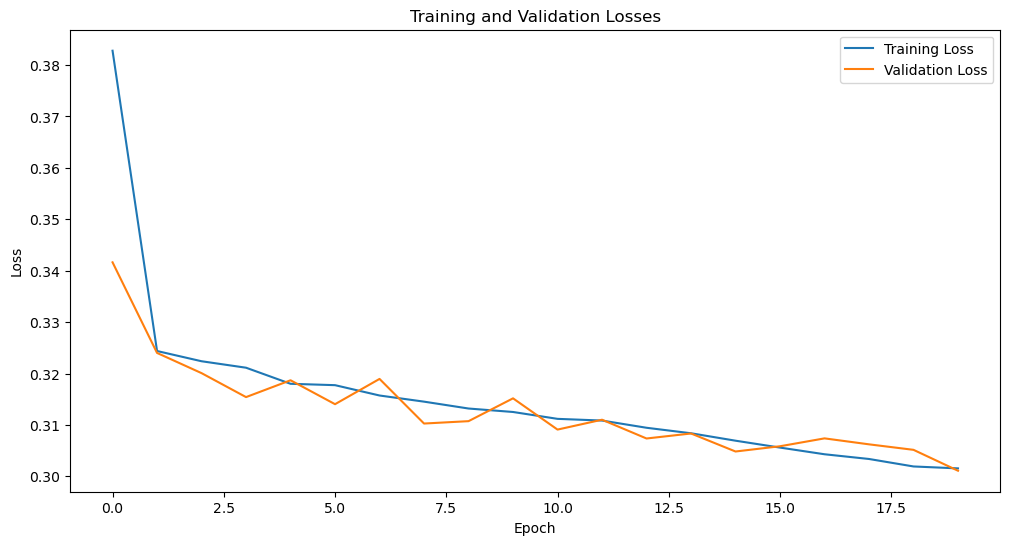

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:


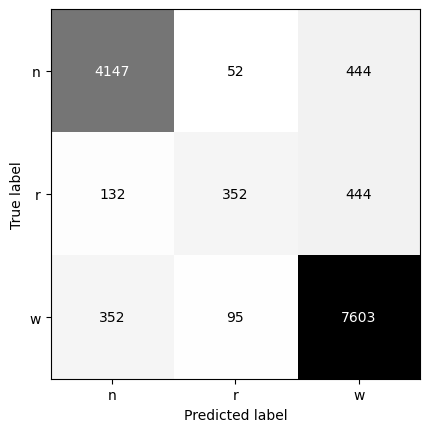

F1 Score per class:  [0.89432823 0.49334268 0.91929146]
Micro F1 Score:  0.8884810219513986
Epoch 1/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8888 - loss: 0.3025 - val_accuracy: 0.8888 - val_loss: 0.2967
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8894 - loss: 0.3024 - val_accuracy: 0.8891 - val_loss: 0.2958
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8909 - loss: 0.3010 - val_accuracy: 0.8868 - val_loss: 0.2986
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8915 - loss: 0.3001 - val_accuracy: 0.8892 - val_loss: 0.2949
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8927 - loss: 0.2923 - val_accuracy: 0.8899 - val_loss: 0.2974
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8917 - loss: 0.2953 - val_accuracy: 0.8894 - val_loss: 0.2958
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8922 - loss: 0.2964 - val_accuracy: 0.8881 - val_loss: 0.2953
Epoch 8/20
8

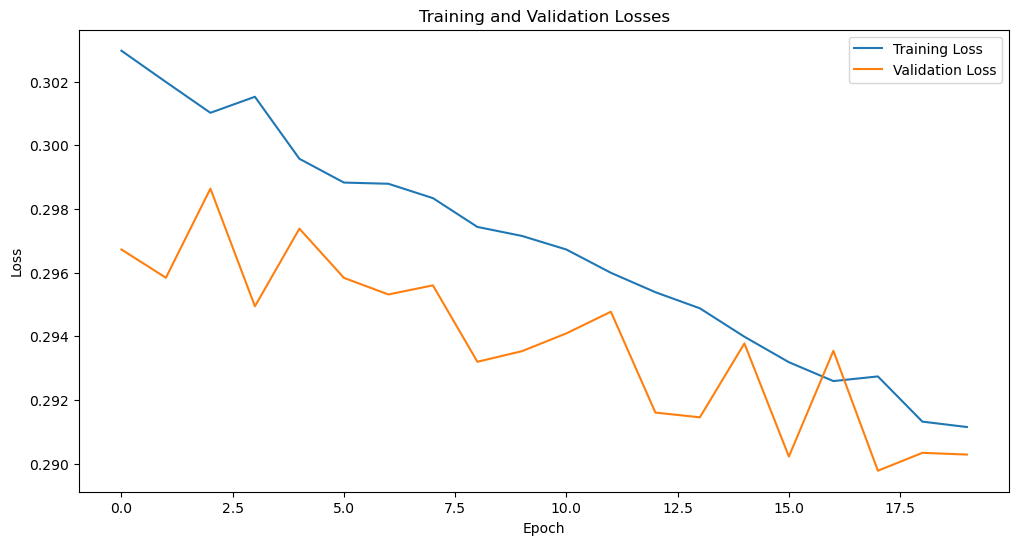

426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Confusion Matrix:


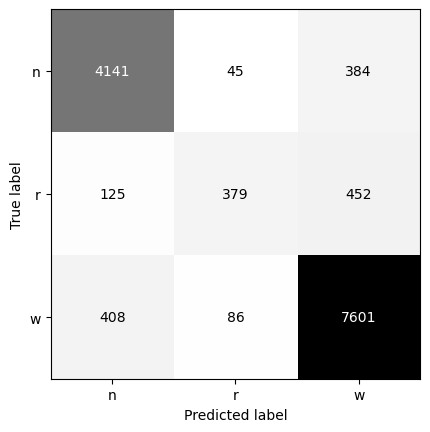

F1 Score per class:  [0.8959325  0.51705321 0.91954996]
Micro F1 Score:  0.8898759268776154
Epoch 1/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8935 - loss: 0.2875 - val_accuracy: 0.8938 - val_loss: 0.2919
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8931 - loss: 0.2899 - val_accuracy: 0.8916 - val_loss: 0.2969
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8954 - loss: 0.2864 - val_accuracy: 0.8939 - val_loss: 0.2917
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8952 - loss: 0.2799 - val_accuracy: 0.8938 - val_loss: 0.2942
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8936 - loss: 0.2859 - val_accuracy: 0.8943 - val_loss: 0.2927
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8940 - loss: 0.2838 - val_accuracy: 0.8935 - val_loss: 0.2926
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8910 - loss: 0.2891 - val_accuracy: 0.8943 - val_loss: 0.2932
Epoch 8/20
8

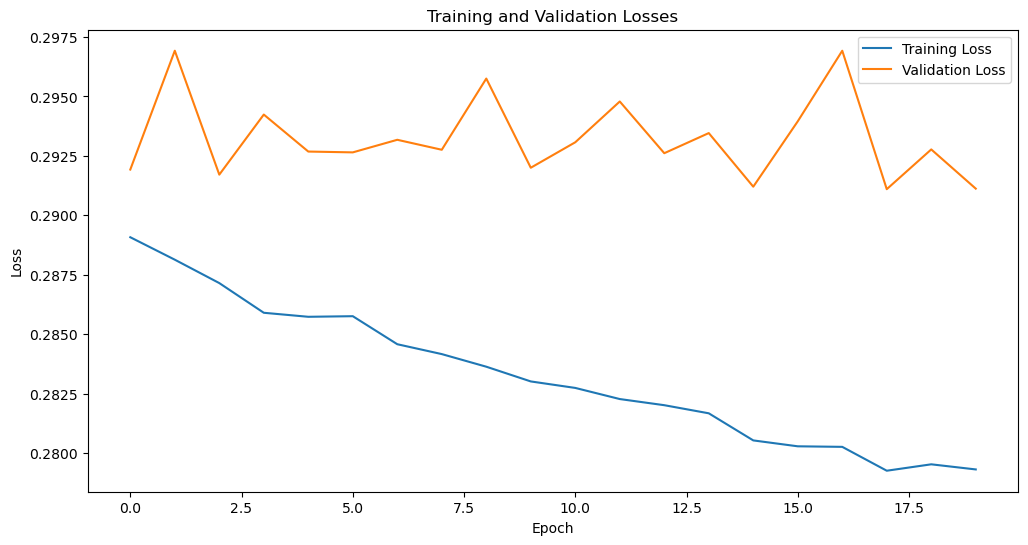

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:


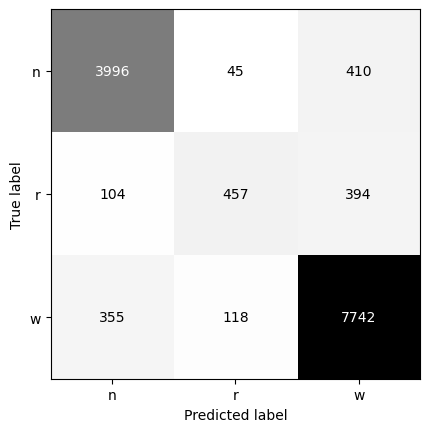

F1 Score per class:  [0.89737256 0.58031746 0.92381123]
Micro F1 Score:  0.8953087144849864


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,235 (1.66 MB)

 Trainable params: 145,411 (568.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 290,824 (1.11 MB)

In [12]:
# Load the data
data_1 = pd.read_csv('EEG_mouse_data_1.csv')
data_2 = pd.read_csv('EEG_mouse_data_2.csv')
data = pd.concat([data_1, data_2])

# Preprocess the data
features = data.columns[[2, 7, 1, 4, 3, 12, 6, 5, 11, 13, 15, 14, 8, 10, 16, 17, 18, 9, 64, 70, 71, 75, 76, 73, 72]]

X = data[features].values
y = data['state'].values  # Target variable


# Convert labels to integer values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert integer labels to categorical
y = to_categorical(y)

# Define the MLP model
model = Sequential()
model.add(Input(shape=(25,))) # Input layer with 25 features

model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))

model.add(Dense(y.shape[1], activation='softmax'))  # Number of neurons equals number of classes

# Define your learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.2)

# Pass the learning rate to the optimizer
sgd = SGD(learning_rate=lr_schedule)
sgd_with_momentum = SGD(learning_rate=lr_schedule, momentum=0.9)
adam = keras.optimizers.Adam(learning_rate=0.001)
nadam = keras.optimizers.Nadam(learning_rate=0.001)
adamax = keras.optimizers.Adamax(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=['accuracy'])

# Use 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
    X_val = scaler.transform(X_val)  # Transform the validation data

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate the model
    y_pred = model.predict(X_val)
    
    print('Confusion Matrix:\n')
    # Compute confusion matrix
    cm = confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

    # Create ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

    # Plot confusion matrix with black text
    disp.plot(cmap='binary', colorbar=False, values_format='d')
    plt.show()
        
    confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))
    
    f1_scores_per_class = f1_score(y_val.argmax(axis=1), y_pred.argmax(axis=1), average=None)
    f1_score_micro = f1_score(y_val.argmax(axis=1), y_pred.argmax(axis=1), average='micro')

    print('F1 Score per class: ', f1_scores_per_class)
    print('Micro F1 Score: ', f1_score_micro)
   
   
model.summary() 
    

# implementing a grid search to optimize a Keras neural network model. 

The `create_model` function defines the architecture of the neural network model, which includes an input layer, a variable number of hidden layers, and an output layer. The number of neurons in the hidden layers, the activation function, the weight initialization method, and the optimizer are all parameters that can be tuned.

The `KerasClassifier` is a wrapper that allows the Keras model to be used like a Scikit-learn estimator.

The grid search parameters are defined as lists of possible values for the optimizer, initialization mode, activation function, number of neurons, number of layers, number of epochs, and batch size.

The `GridSearchCV` function from Scikit-learn is then used to perform the grid search over the specified parameter grid on the model. The model is trained and evaluated multiple times, each time with a different combination of parameters. The combination of parameters that results in the best model performance is then printed out.

In [9]:

# Load the data
data_1 = pd.read_csv('EEG_mouse_data_1.csv')
data_2 = pd.read_csv('EEG_mouse_data_2.csv')
data = pd.concat([data_1, data_2])

# Preprocess the data
features = data.columns[1:26]  # Select 25 features
X = data[features].values
y = data['state'].values  # Target variable


# Convert labels to integer values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert integer labels to categorical
y = to_categorical(y)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(25,))) # Input layer with 25 features

    model.add(Dense(512, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))
    

    model.add(Dense(y.shape[1], activation='softmax'))  
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\naimi\anaconda3\envs\isd\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.868169 using {'optimizer': 'Adamax'}


# Competition 

Save the model's predictions on the test set to a file named `test_pred.npy`. The predictions should be in the form of a NumPy array with shape `(n_samples,)` where `n_samples` is the number of samples in the test set. Each element in the array should be an integer corresponding to the predicted class label for that sample.

In [4]:
# Save the model's predictions on the test set
test_data = pd.read_csv('EEG_mouse_data_test.csv')
X_test = test_data[features].values  # Use the same features as the training data
X_test = scaler.transform(X_test)  # Use the same scaler fitted on the last training fold
test_predictions = model.predict(X_test)

with open('test_pred.npy', 'wb') as f:
    np.save(f, test_predictions.argmax(axis=1))

NotFittedError: Estimator needs to be fit before `predict` can be called